# Pi-filter

![Pi filter](Pi-Filter.png){#fig-pi-filter}  

## Introduction
A question posted on [Electronics Stackexchange](https://electronics.stackexchange.com/questions/681002/how-to-find-transfer-function-for-this-pi-filter-using-facts-method-with-6-react/681087#681087) by @user15174 looked interesting, he asked: 

>Am trying to apply the FACTS method to find out the transfer function for this circuit as shown below. This is a Pi-filter circuit with all its component parasitics and also including the source and load resistances. I would like to find out the transfer function of this circuit and match its plot from Mathcad with simulation.

>First, to find out the zeros of the this transfer function by inspection, I placed all circuit elements in its high frequency state. I can observe the response Vout is still present. In that case, can I assume that this circuit has 6 zeros associated with it?

>But as per the answer provided in this link, we have to place the other associated circuit element in its DC state and observe if the response is still present. Since this circuit has around 6 reactive elements, how do I decide which circuit element should be in DC State and which circuit element should be in high frequency state?

>I was able to follow some examples done based on 2nd and 3rd order circuits shared in the above links. But with this circuit configuration and so many reactive elements, frankly am lost.
It would be great if you could share some insight on how to derive the transfer function for this circuit including its poles and zeros.

The FACTS (Fast Analytical Circuits Techniques) method refers to a circuit analysis technique that enables engineers to obtain the transfer functions and input and output impedances of a circuit by inspection without resorting to too much algebra. The circuits offered as illustrations of the technique are small with one or two branches. I was able to find several references on-line describing the FACTS method. 

@Middlebrook1991 seems to have been the first proponent of the method and describes what he calls design orientated analysis. He talks about low entropy equations, in which the terms and elements are ordered or grouped in such a way that their physical orgin, where they come from in the circuit, what part of the circuit contributes to this part of the final expression becomes obious. The method is also described in @Middlebrook1992. 

@basso2016 introduces the topic at a conference and has written a book on the subject. The method involves looking at time constants for branches with L's or C's. The advantage is that only pencil and paper are needed. 

<!--

@basso2016, Introduction to Fast Analytical Techniques: Application to Small-Signal Modeling

- Time Constants and Poles
- Identifying the Zeros

Involves looking at time constants for branches with L's or C's.   
requires learning the technique, advantage is that only pencil and paper are needed. But are the results accurate?

@Middlebrook1991, Low-entropy expressions: the key to design-oriented analysis

- Design is the reverse of analysis
- doing the algebra on the circuit diagram
- gives a simple example, 

A low entropy equation is one in which the terms and elements are ordered or grouped in such a way that their physical orgin, where they come from in the circuit, what part of the circuit contributes to this part of the final expression becomes obious.

conventional algebra leads to high entropy equations

Look at his equations 1 and 2 and the way the terms are rearanged - are thses two equaliventy? 

@Middlebrook1992, Methods of design orientated analysis: the quadratic equation revisited

Need to know the intent of purpose of the circuit (specifiction or requirements)

What did the community provide as answers? and what did the answers say relative to the FACTS method.

@basso2016, Introduction to Fast Analytical Techniques: Application to Small-Signal Modeling

- Time Constants and Poles
- Identifying the Zeros

Involves looking at time constants for branches with L's or C's.   
requires learning the technique, advantage is that only pencil and paper are needed. But are the results accurate?
-->

<!--
The FACTS reference is from @basso2016

https://electronics.stackexchange.com/questions/681002/how-to-find-transfer-function-for-this-pi-filter-using-facts-method-with-6-react/681087#681087

Get a list of references.

What is the FACTS method?  See presentation for somewhat of an explination

- Brute-force algebra complicates analysis  
- More energy is needed to unveil these terms  
- factor and rearrange coefficients  
- simplify numerator and denominator  
- Don’t make mistakes!  

This is a high-entropy expression  

- What if you could write the expression in one shot?  
- Naturally reading gains, poles and zeros...  
- This is a low-entropy expression  

- Fast Analytical Techniques at a Glance  
- Look at the circuit for s = 0  
- Capacitor are open circuited  
- Inductors are short circuited  
- SPICE operating point calculation  
- Determine the gain in this condition


- Plotting a transfer function is easy with nowadays tools
- You have no insight on what affects poles or zeros
- Analytical analysis is important but the form matters
- A low-entropy expression unveils contributors to poles/zeros
- FACTs naturally lead to low-entropy expressions
- Break the circuit into simple schematics
- Determine time constants in each configuration
- Small-signal analysis makes extensive use of FACTs
- SPICE and Mathcad are useful instruments to track errors
- Becoming skilled with FACT requires practice and tenacity!


@fig-pi-filter

- why this circuit?
- what if parisidic elements are set to zero?

-->

## Community answers
The answeres provided by the community involved reducing the circuit to Z1, Z2 and Z3 as shown in @fig-pi-filter-facts and then substituting back into the transfer function the impedances for each of the Z's. The assurtion made by the proponents of FACTS, is that brute force circuit analysis is complicated and error prone. The results of the brute force analysis are what the authors call high entropy expressions that offer little insight into the operation of the circuit. A low entropy expression allows one to naturally read the gains, poles and zeros of the expression, which is what FACTS aims to provide.   

From what I gather, FACTS is a circuit analysis method where the transfer function is determined by some simple techniques and the poles and zeros of the transfer function are relatable to parts of the circuit and thereby some insight is gained into the operation of the circuit. But the simple techniques do take some practice and proficiency to master. The main advantage seems to be is the analysis technique can be quickly done with pencil and paper by hand without using a computer or calculator to solve several equations to find the node voltages. 

There are two answers provided by the community, user @user347817 provided a detailed and user Telsa23 provided a shorter answer, both are described below.

## Circuit description
@fig-pi-filter shows the schematic as I re-drew it with LTSpice. I numbered each of the nodes and made some changes to the reference designators. In the orginal question, no component values were provided. I set the component values so that the numerical values of the poles and zeros could be calculated and not be located at the same frequecies on the complex plane. The circuit is a three section ladder filter and these are sometimes called Pi filters because the connection represent the greek letter $\pi$. $R_{In}$ and $R_{Out}$ are the input and out put impedances of the preceding and subsequent stages, so I relabled them as such. The questioneer didn't provide any explination about the application of this circuit or if the R's L's and C's are non-ideal models of the actual components. The circuit has 13 branches and 8 nodes.  

## Circuit analysis
MNA will be used to 'brute force' analyze the circuit and solve for the transfer function and find the poles and zeros using the power of Python and SymPy. Then a FACTS type analysis will be attempted, where the branches  of the Pi filter will be combined into an impedance and then the network will be solved. The proposed solutions offered by the comminity for the question calculated the transfer function from v2 to v8.   

The net list for the filter is:
```
V1 8 0 1
R_in 1 8 1
R1 1 4 1
Ra 3 1 1
R2 2 3 0.5
R3 2 6 1
R_out 2 0 1
L1 4 5 1 Rser=0
L2 3 2 1 Rser=0
L3 6 7 0.5 Rser=0
C1 5 0 1
C2 2 3 0.5
C3 7 0 0.5
```

The following Python modules are used.

In [1]:
from sympy import *
import numpy as np
from tabulate import tabulate
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import SymMNA
from IPython.display import display, Markdown, Math, Latex
init_printing()

## 'Brute Force' Symbolic MNA procedure
Doing a so called brute force analysis. The goal is to get the transfer function and the poles and zeros. 

Load the netlist

In [2]:
net_list = '''
V1 8 0 1
R_in 1 8 1
R1 1 4 1
Ra 3 1 1
R2 2 3 0.5
R3 2 6 1
R_out 2 0 1
L1 4 5 1 
L2 3 2 1 
L3 6 7 0.5 
C1 5 0 1
C2 2 3 0.5
C3 7 0 0.5
'''

Generate the network equations.

In [3]:
report, network_df, df2, A, X, Z = SymMNA.smna(net_list)

# Put matricies into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

Generate markdown text to display the network equations.

In [4]:
temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*X)[i:i+1][0],Z[i])))

Markdown(temp)

$v_{1} \cdot \left(\frac{1}{Ra} + \frac{1}{R_{in}} + \frac{1}{R_{1}}\right) - \frac{v_{3}}{Ra} - \frac{v_{8}}{R_{in}} - \frac{v_{4}}{R_{1}} = 0$<br>$- I_{L2} + v_{2} \left(C_{2} s + \frac{1}{R_{out}} + \frac{1}{R_{3}} + \frac{1}{R_{2}}\right) + v_{3} \left(- C_{2} s - \frac{1}{R_{2}}\right) - \frac{v_{6}}{R_{3}} = 0$<br>$I_{L2} + v_{2} \left(- C_{2} s - \frac{1}{R_{2}}\right) + v_{3} \left(C_{2} s + \frac{1}{Ra} + \frac{1}{R_{2}}\right) - \frac{v_{1}}{Ra} = 0$<br>$I_{L1} - \frac{v_{1}}{R_{1}} + \frac{v_{4}}{R_{1}} = 0$<br>$C_{1} s v_{5} - I_{L1} = 0$<br>$I_{L3} - \frac{v_{2}}{R_{3}} + \frac{v_{6}}{R_{3}} = 0$<br>$C_{3} s v_{7} - I_{L3} = 0$<br>$I_{V1} - \frac{v_{1}}{R_{in}} + \frac{v_{8}}{R_{in}} = 0$<br>$v_{8} = V_{1}$<br>$- I_{L1} L_{1} s + v_{4} - v_{5} = 0$<br>$- I_{L2} L_{2} s - v_{2} + v_{3} = 0$<br>$- I_{L3} L_{3} s + v_{6} - v_{7} = 0$<br>

As shown above MNA generated many equations and these would be difficult to solve by hand and a symbolic soultion would take a lot of computing time. The equations are displayed in matrix notation.

In [5]:
NE_sym

⎡              ⎛1     1    1 ⎞   v₃    v₈   v₄            ⎤       
⎢           v₁⋅⎜── + ─── + ──⎟ - ── - ─── - ──            ⎥       
⎢              ⎝Ra   Rᵢₙ   R₁⎠   Ra   Rᵢₙ   R₁            ⎥       
⎢                                                         ⎥       
⎢           ⎛        1     1    1 ⎞      ⎛        1 ⎞   v₆⎥       
⎢-I_L2 + v₂⋅⎜C₂⋅s + ──── + ── + ──⎟ + v₃⋅⎜-C₂⋅s - ──⎟ - ──⎥       
⎢           ⎝       Rₒᵤₜ   R₃   R₂⎠      ⎝        R₂⎠   R₃⎥   ⎡0 ⎤
⎢                                                         ⎥   ⎢  ⎥
⎢              ⎛        1 ⎞      ⎛       1    1 ⎞   v₁    ⎥   ⎢0 ⎥
⎢    I_L2 + v₂⋅⎜-C₂⋅s - ──⎟ + v₃⋅⎜C₂⋅s + ── + ──⎟ - ──    ⎥   ⎢  ⎥
⎢              ⎝        R₂⎠      ⎝       Ra   R₂⎠   Ra    ⎥   ⎢0 ⎥
⎢                                                         ⎥   ⎢  ⎥
⎢                            v₁   v₄                      ⎥   ⎢0 ⎥
⎢                     I_L1 - ── + ──                      ⎥   ⎢  ⎥
⎢                            R₁   R₁                      ⎥   

The symbols generated by the Python code are extraced by the SymPy function free_symbols and then declared as SymPy variables. 

In [6]:
# turn the free symbols into SymPy variables
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

Built a dictionary of element values.

In [7]:
element_values = SymMNA.get_part_values(network_df)
element_values

Generate the symbolic solution, which takes a couple of minutes on my laptop's Intel i3-8130U CPU @ 2.20GHz.

In [8]:
U_sym = solve(NE_sym,X)

The solution to the network equations in symbolic form are long, so the code to display them is commented out.

In [9]:
#temp = ''
#for i in U_sym.keys():
#    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

#Markdown(temp)

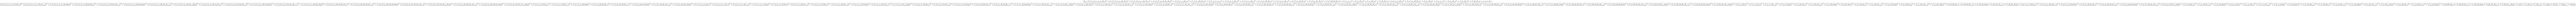

In [10]:
H_sym = (U_sym[v2]/U_sym[v8]).simplify()
H_sym

The FACTS method is supposed to reveal aspects of the circuit operation that get hidden by the algebra. I think the Pi Filter is too complex for this to be true. If more about the circuit was known, some simplification could be done and a more meaningful analyis could be performed. 

The numerator and denominator of the transfer function can be extracted for analysis. 

In [11]:
n, d = fraction(H_sym)
display('numerator', n, 'denominator', d)

'numerator'

'denominator'

Solve for the roots of the numberator.

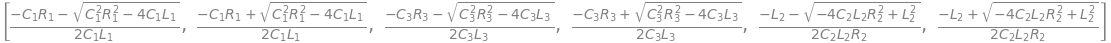

In [12]:
solve(n,s)

We can see that there are six zeros in the transfer function. Here can see what components are influncing the zeros. Once of the gaols of the FACTS method was to determine the zeros of the network.

Solve for the roots of the denominator

In [13]:
#solve(d,s)

SymPy could not find a solution for roots of denominator.

## Use numerical values for components

In [14]:
element_values

### Numerical solution

In [15]:
NE = NE_sym.subs(element_values)
NE

⎡              3.0⋅v₁ - v₃ - v₄ - v₈              ⎤   ⎡ 0 ⎤
⎢                                                 ⎥   ⎢   ⎥
⎢-I_L2 + v₂⋅(0.5⋅s + 4.0) + v₃⋅(-0.5⋅s - 2.0) - v₆⎥   ⎢ 0 ⎥
⎢                                                 ⎥   ⎢   ⎥
⎢I_L2 - v₁ + v₂⋅(-0.5⋅s - 2.0) + v₃⋅(0.5⋅s + 3.0) ⎥   ⎢ 0 ⎥
⎢                                                 ⎥   ⎢   ⎥
⎢               I_L1 - v₁ + 1.0⋅v₄                ⎥   ⎢ 0 ⎥
⎢                                                 ⎥   ⎢   ⎥
⎢                -I_L1 + 1.0⋅s⋅v₅                 ⎥   ⎢ 0 ⎥
⎢                                                 ⎥   ⎢   ⎥
⎢               I_L3 - v₂ + 1.0⋅v₆                ⎥   ⎢ 0 ⎥
⎢                                                 ⎥ = ⎢   ⎥
⎢                -I_L3 + 0.5⋅s⋅v₇                 ⎥   ⎢ 0 ⎥
⎢                                                 ⎥   ⎢   ⎥
⎢               I_V1 - v₁ + 1.0⋅v₈                ⎥   ⎢ 0 ⎥
⎢                                                 ⎥   ⎢   ⎥
⎢                       v₈              

In [16]:
U = solve(NE,X)

temp = ''
for i in U.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U[i]))

Markdown(temp)

$v_{1} = \frac{2.0 s^{6} + 18.0 s^{5} + 62.0 s^{4} + 112.0 s^{3} + 112.0 s^{2} + 68.0 s + 16.0}{3.0 s^{6} + 29.0 s^{5} + 109.0 s^{4} + 210.0 s^{3} + 218.0 s^{2} + 116.0 s + 24.0}$<br>$v_{2} = \frac{s^{6} + 7.0 s^{5} + 21.0 s^{4} + 40.0 s^{3} + 42.0 s^{2} + 28.0 s + 8.0}{3.0 s^{6} + 29.0 s^{5} + 109.0 s^{4} + 210.0 s^{3} + 218.0 s^{2} + 116.0 s + 24.0}$<br>$v_{3} = \frac{s^{6} + 9.0 s^{5} + 31.0 s^{4} + 58.0 s^{3} + 58.0 s^{2} + 36.0 s + 8.0}{3.0 s^{6} + 29.0 s^{5} + 109.0 s^{4} + 210.0 s^{3} + 218.0 s^{2} + 116.0 s + 24.0}$<br>$v_{4} = \frac{2.0 s^{6} + 16.0 s^{5} + 46.0 s^{4} + 68.0 s^{3} + 60.0 s^{2} + 52.0 s + 16.0}{3.0 s^{6} + 29.0 s^{5} + 109.0 s^{4} + 210.0 s^{3} + 218.0 s^{2} + 116.0 s + 24.0}$<br>$v_{5} = \frac{2.0 s^{4} + 16.0 s^{3} + 44.0 s^{2} + 52.0 s + 16.0}{3.0 s^{6} + 29.0 s^{5} + 109.0 s^{4} + 210.0 s^{3} + 218.0 s^{2} + 116.0 s + 24.0}$<br>$v_{6} = \frac{s^{6} + 5.0 s^{5} + 11.0 s^{4} + 26.0 s^{3} + 30.0 s^{2} + 24.0 s + 8.0}{3.0 s^{6} + 29.0 s^{5} + 109.0 s^{4} + 210.0 s^{3} + 218.0 s^{2} + 116.0 s + 24.0}$<br>$v_{7} = \frac{4.0 s^{4} + 20.0 s^{3} + 28.0 s^{2} + 24.0 s + 8.0}{3.0 s^{6} + 29.0 s^{5} + 109.0 s^{4} + 210.0 s^{3} + 218.0 s^{2} + 116.0 s + 24.0}$<br>$v_{8} = 1.0$<br>$I_{V1} = \frac{- s^{6} - 11.0 s^{5} - 47.0 s^{4} - 98.0 s^{3} - 106.0 s^{2} - 48.0 s - 8.0}{3.0 s^{6} + 29.0 s^{5} + 109.0 s^{4} + 210.0 s^{3} + 218.0 s^{2} + 116.0 s + 24.0}$<br>$I_{L1} = \frac{2.0 s^{5} + 16.0 s^{4} + 44.0 s^{3} + 52.0 s^{2} + 16.0 s}{3.0 s^{6} + 29.0 s^{5} + 109.0 s^{4} + 210.0 s^{3} + 218.0 s^{2} + 116.0 s + 24.0}$<br>$I_{L2} = \frac{2.0 s^{4} + 10.0 s^{3} + 18.0 s^{2} + 16.0 s + 8.0}{3.0 s^{6} + 29.0 s^{5} + 109.0 s^{4} + 210.0 s^{3} + 218.0 s^{2} + 116.0 s + 24.0}$<br>$I_{L3} = \frac{2.0 s^{5} + 10.0 s^{4} + 14.0 s^{3} + 12.0 s^{2} + 4.0 s}{3.0 s^{6} + 29.0 s^{5} + 109.0 s^{4} + 210.0 s^{3} + 218.0 s^{2} + 116.0 s + 24.0}$<br>

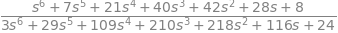

In [17]:
H = (U[v2]/U[v8]).nsimplify().simplify().expand().together()
H

#### Convert transfer function to SciPy system
In this section we convert the SymPy equations into Numpy format.  

Extract the numerator and denominator polynomials so that the system can be defined in SciPy.

In [18]:
H_num, H_denom = fraction(H) #returns numerator and denominator

The SciPy function, TransferFunction, represents the system as the continuous-time transfer function and takes as inputs the coeeficients of the numerator and denominator polynominals.

In [19]:
# convert symbolic to numpy polynomial
a = np.array(Poly(H_num, s).all_coeffs(), dtype=float)
b = np.array(Poly(H_denom, s).all_coeffs(), dtype=float)
sys = signal.TransferFunction(a,b)

### Poles and zeros of the low pass transfer function
The poles and zeros of the transfer function can easly be obtained with the following code:

In [20]:
sys_zeros = np.roots(sys.num)
sys_poles = np.roots(sys.den)

#### Pole zero plot
The poles and zeros of the function are plotted on the complex plane.

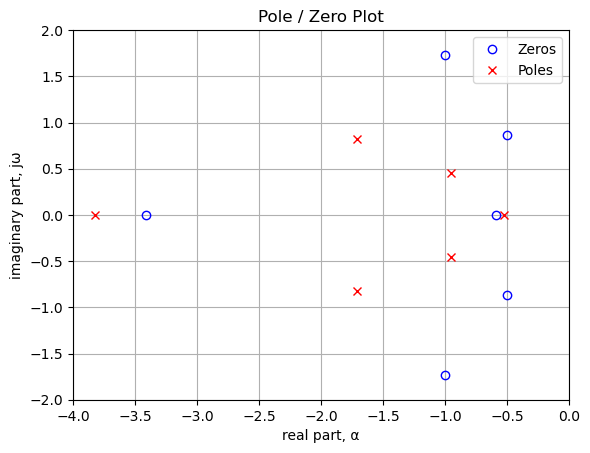

In [21]:
plt.plot(np.real(sys_zeros), np.imag(sys_zeros), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles), np.imag(sys_poles), 'xr')
plt.legend(['Zeros', 'Poles'], loc=0)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
plt.ylim((-2,2))
plt.xlim((-4,0))
plt.grid()
plt.show()

Printing the value of the poles and zeros in radians per second.

In [22]:
print('number of zeros: {:d}'.format(len(sys_zeros)))
for i in sys_zeros:
    print('{:,.3f} rad/s'.format(i))

number of zeros: 6
-3.414+0.000j rad/s
-1.000+1.732j rad/s
-1.000-1.732j rad/s
-0.500+0.866j rad/s
-0.500-0.866j rad/s
-0.586+0.000j rad/s


In [23]:
print('number of poles: {:d}'.format(len(sys_poles)))
for i in sys_poles:
    print('{:,.3f} rad/s'.format(i))

number of poles: 6
-3.823+0.000j rad/s
-1.709+0.820j rad/s
-1.709-0.820j rad/s
-0.951+0.456j rad/s
-0.951-0.456j rad/s
-0.523+0.000j rad/s


### Bode plot
Use the SciPy function [bode](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bode.html) to plot the magnitude and phase of the filter. In electrical engineering, a [Bode plot](https://en.wikipedia.org/wiki/Bode_plot) is a graph of the frequency response of a system. It is usually a combination of the magnitude (usually in decibels) of the frequency response and the phase shift. As originally conceived by Hendrik Wade Bode in the 1930s, the plot is an asymptotic approximation of the frequency response, using straight line segments. Bode plots are used to assess the stability of systems by finding the gain and phase margins.

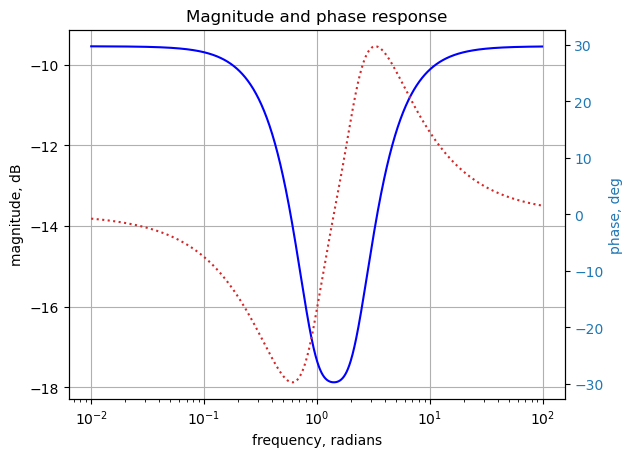

In [24]:
x = np.logspace(-2, 2, 1000, endpoint=False) #*2*np.pi
w, mag, phase = signal.bode(sys, w=x) # returns: rad/s, mag in dB, phase in deg

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, radians')

plt.semilogx(w, mag,'-b')    # Bode magnitude plot

ax1.tick_params(axis='y')
#ax1.set_ylim((-30,20))
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

plt.semilogx(w, phase,':',color='tab:red')  # Bode phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

plt.title('Magnitude and phase response')
plt.show()

<!--
Write the impedances for each of the branches of the circuit.

Franc's answer walks through the FACTS method

### References

Methods of Design Oriented Analysis](https://www.scribd.com/document/422935307/Methods-of-design-oriented-analysis)

@Middlebrook1992, Methods of Design-Oriented Analysis: The Quadratic Equation Revisited

@Middlebrook1991, Low-entropy expressions: the key to design-oriented analysis

@basso2016, Introduction to Fast Analytical Techniques: Application to Small-Signal Modeling

<!--
Methods of DE~sign-Oriented Analysis: The Quadratic Equation Revisited
@INPROCEEDINGS{Middlebrook1992,
  author={Middlebrook, R.D.},
  booktitle={Proceedings. Twenty-Second Annual conference Frontiers in Education}, 
  title={Methods of Design-Oriented Analysis: The Quadratic Equation Revisited}, 
  year={1992},
  pages={95-102},
  doi={10.1109/FIE.1992.683365}
}

Low-entropy expressions: the key to design-oriented analysis
@INPROCEEDINGS{Middlebrook1991,
  author={Middlebrook, R.D.},
  booktitle={Proceedings Frontiers in Education Twenty-First Annual Conference. Engineering Education in a New World Order}, 
  title={Low-entropy expressions: the key to design-oriented analysis}, 
  year={1991},
  pages={399-403},
  doi={10.1109/FIE.1991.187513}
}

@online{basso2016,
    author = {Basso, Christophe},
    title = {Introduction to Fast Analytical Techniques: Application to Small-Signal Modeling},
    url  = {https://www.powersimtof.com/Downloads/PPTs/Chris%20Basso%20APEC%20seminar%202016.pdf},
    year={2016},
    addendum = {accessed 12 Feb 2024}
}


[Introduction to Fast Analytical Techniques: Application to Small-Signal Modeling](https://www.powersimtof.com/Downloads/PPTs/Chris%20Basso%20APEC%20seminar%202016.pdf)

-->

## FACTS solution
The FACTS solution involves some simplification of the circuit, when possible, and determining the time constants of the poles and zeros of the network. Since I'm not proficient with this method and the thrust of my circuit analysis notebooks are to usilize the MNA procedure, the following calculations will somewhat follow the solutions provided by the comunity. 

I think my Python based symbolic MNA code provides an easy and less error prone method of obtaining solutions to network problems. The same proported advantages of using FACTS, that is, less math, less algebra and some insight into the circuit operation are available with SMNA, since the computer does all the heavy lifting.

@fig-pi-filter-facts, shows the orginal circuit re-drawn with the branches replaced by their transformed impedances.

![Pi filter FACTS](Pi-Filter-facts.png){#fig-pi-filter-facts}  

The components for the branches are replace by Z1, Z2 and Z3.

```
Z1 = series connection of R1, L1 and C1

Z2 = series connection of Ra and (L2 || C2 || R2)

Z3 = series connection of R3, L3 and C3

Z4 = Z3 || R_out
```

The following defines the SymPy symbols used in the calculations. The function [symbols](https://docs.sympy.org/latest/tutorials/intro-tutorial/gotchas.html#symbols) takes a string of variable names separated by spaces or commas, and creates Symbols out of them.

In [25]:
L1, L2, L3, R1, R2, R3, Ra, R, R_out, R_in, C1, C2, C3, s, V1 = symbols('L1, L2, L3, R1, R2, R3, Ra, R, R_out, R_in, C1, C2, C3, s, V1')

### Branches of the circuit
Z1 is the series connection of R1, C1 and L1.

In [26]:
Z1_sym = R1+s*L1+1/(s*C1)
Z1_sym

Z2 is the series connection of Ra and the paralle connection of R2, L2 and C2

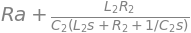

In [27]:
Z2_sym = Ra + (s*L2*(1/(s*C2))*R2)/(1/(s*C2)+s*L2+R2)    # products over sums of (L2 || C2 || R2) plus Ra, 
Z2_sym

Z3 is the series connection of R3, L3 and C3

In [28]:
Z3_sym = R3+s*L3+1/(s*C3)
Z3_sym

Z4 is the parallel combination of R_out and Z3. 

Z4 = R_out || Z3

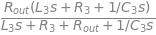

In [29]:
Z4_sym = R_out*Z3_sym/(R_out+Z3_sym)
Z4_sym

@user347817 provided a MatCAD like set of calculations. Using "||" to indicate a parallel combination of components and a "+" to indicate a series combination of componets, some of his calculations are shown here:  

$Z_1 = R_2 + sL_1 + \frac {1}{sC_1}$  
$Z_2 = R_6 + R_3 || sL_2 || \frac {1}{sC_2}$    
$Z_3 = R_4 + sL_3 + \frac {1}{sC_3}$  
$Z_4 = Z_3 || R_2$  

$V_1 = \frac {(Z_1 || (Z_2+Z_4))} {(R_1+Z_1 || (Z_2+Z_4))} V_i$  

$V_o = \frac {Z_4} {(Z_4+Z_2)} V_1$

$V_o = \frac {Z_4} {(Z_4+Z_2)} \frac {(Z_1 || (Z_2+Z_4))} {(R_1+Z_1 || (Z_2+Z_4))} V_i$ 

In [30]:
Z1, Z2, Z3, Z4, R_in, R_out, V1 = symbols('Z1, Z2, Z3, Z4, R_in, R_out, V1')

Zx is the parallel combination of Z1, Z2 and Z4.

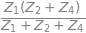

In [31]:
Zx = Z1*(Z2+Z4)/(Z1+Z2+Z4)
Zx

The voltage at node 1 is calculated by using the voltage divider formula for Zx and Rin.

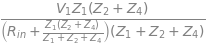

In [32]:
v_node1 = V1*Zx/(R_in+Zx)
v_node1

Vout is the voltage divider of Z2 and Z4.

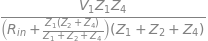

In [33]:
V_out =  v_node1*Z4/(Z2+Z4)
V_out

The trasfer function is Vout/Vin.

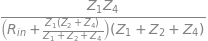

In [34]:
H_facts_z = V_out/V1
H_facts_z

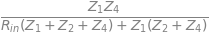

In [35]:
H_facts_z.simplify()

Repeating the calculations from above, but using symbolic expressions for Z1, Z2, Z3 and Z4.

Zx is the combination of Z's looking towards the output of the filter.
Zx = Z1 || (Z2+Z4)

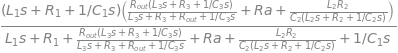

In [36]:
Zx_sym = Z1_sym*(Z2_sym+Z4_sym)/(Z1_sym+Z2_sym+Z4_sym)
Zx_sym

The voltage at node 1 is
```
v_node1 = V1*Zx/(R_in+Zx)
```

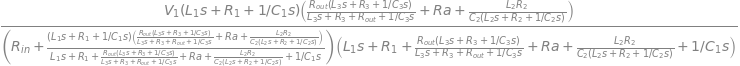

In [37]:
v_node1_sym = V1*Zx_sym/(R_in+Zx_sym)
v_node1_sym

V_out is the output of the voltage divider circuit formed by Z2 and Z4

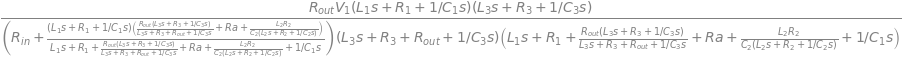

In [38]:
V_out_sym =  v_node1_sym*Z4_sym/(Z2_sym+Z4_sym)
V_out_sym

## H_facts_sym
The transfer function as determined by taking the impedance of branches and combining by series and parallel combinations can be expressed below.

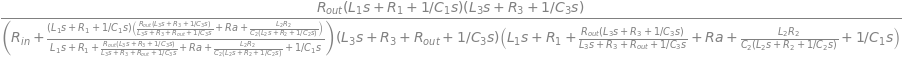

In [39]:
H_facts_sym = V_out_sym/V1
H_facts_sym

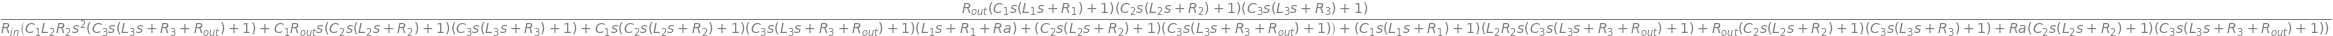

In [40]:
H_facts_sym.simplify()

The element vaules can be put into the equation.

In [41]:
element_values

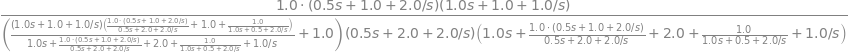

In [42]:
H_facts = H_facts_sym.subs(element_values)
H_facts

$\large{\color {red} {\text{what if you substitute jw for s, first?}}}$  

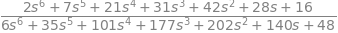

In [43]:
H_facts = H_facts.nsimplify().simplify().expand().together()
H_facts

The transfer fuction obtained by following a FACTS like solution and the answers provided by the comunity, produce a result that is different than the MNA result shown below. 

$\large{\color {red} {\text{Need to investige why there is a difference?}}}$  

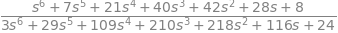

In [44]:
H

Also need to find poles and zeros using FACTS method

- Look at the circuit for s = 0, Determine the gain in this condition
- Look at the resistance driving the storage element, When the excitation is turned off, Vin = 0
  - Remove the capacitor and look into its terminals
  - The first time constant is $\tau_1 = (r_c + R_1)C_1$
  
The rest of the procedure seems complicated, espically when trying to apply to the filter.  

The SciPy function, TransferFunction, represents the system as the continuous-time transfer function and takes as inputs the coeeficients of the numerator and denominator polynominals.

## Comapring various solutions

In [45]:
H_facts_num, H_facts_denom = fraction(H_facts) #returns numerator and denominator

# convert symbolic to numpy polynomial
H_facts_a = np.array(Poly(H_facts_num, s).all_coeffs(), dtype=float)
H_facts_b = np.array(Poly(H_facts_denom, s).all_coeffs(), dtype=float)
H_facts_sys = signal.TransferFunction(H_facts_a,H_facts_b)
H_facts_w, H_facts_mag, H_facts_phase = signal.bode(H_facts_sys, w=x) # returns: rad/s, mag in dB, phase in deg

Load the csv file from LTSpice.

In [46]:
fn = 'Pi-Filter-LTSpice.csv' # data from LTSpice
LTSpice_data = np.genfromtxt(fn, delimiter=',')

# initaliaze some empty arrays
frequency = np.zeros(len(LTSpice_data))
voltage = np.zeros(len(LTSpice_data)).astype(complex)

# convert the csv data to complez numbers and store in the array
for i in range(len(LTSpice_data)):
    frequency[i] = LTSpice_data[i][0]
    voltage[i] = LTSpice_data[i][1] + LTSpice_data[i][2]*1j

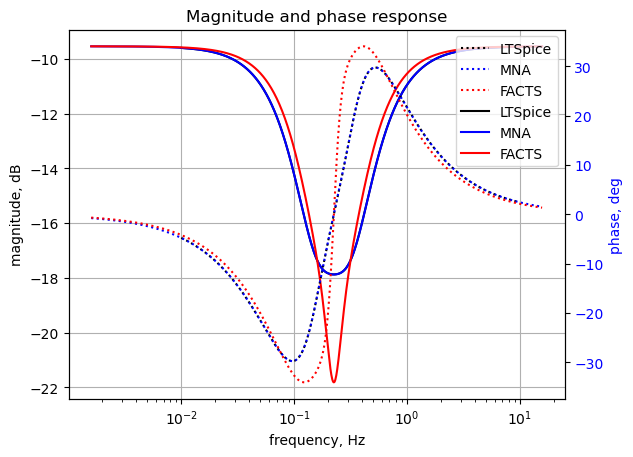

In [47]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(frequency, 20*np.log10(np.abs(voltage)),'-k')    # LTSpice magnitude plot
plt.semilogx(w/(2*np.pi), mag,'-b')    # MNA magnitude plot
plt.semilogx(H_facts_w/(2*np.pi), H_facts_mag,'-r')    # FACTS magnitude plot

ax1.tick_params(axis='y')
#ax1.set_ylim((-30,20))
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'b'

plt.semilogx(frequency, np.unwrap(2*np.angle(voltage)/2) *180/np.pi,':',color='k',label='LTSpice')  # LTSpice phase plot
plt.semilogx(w/(2*np.pi), phase,':',color='b',label='MNA')  # MNA phase plot
plt.semilogx(H_facts_w/(2*np.pi), H_facts_phase,':',color='r',label='FACTS')  # FACTS phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

ax2.plot(np.NaN, np.NaN, color='k', label='LTSpice')
ax2.plot(np.NaN, np.NaN, color='b', label='MNA')
ax2.plot(np.NaN, np.NaN, color='r', label='FACTS')

plt.legend()
plt.title('Magnitude and phase response')
plt.show()

LTSpice and SMNA agree, FACTS results don't agree. 

## Community answers
Both comunity answers did not provide a solution based on the FACTS method. Missing was the steps to extract the time constants of the circuit and from there find the zeros of the network. 

The answer from @user347817 replaces each leg of the filter with Z's and then uses series and parallel equalivent conbinations. As shown above this analysis provides only an approximate solution and probably would not cut the mustard in an acedemic or critical design reviwe.  

The answer provided by Tesla23 is also suspect and seems wrong. The following calculations walk through some of his steps.

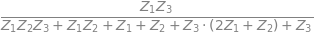

In [48]:
H_telsa23 = ((R*Z1*Z3)/(R*((Z2+2*Z1)*Z3 + Z1*Z2) + R**2*(Z3+Z2+Z1) + Z1*Z2*Z3)).subs({R:1})
H_telsa23

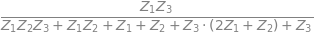

In [49]:
H_telsa23.simplify()

Comparing the results above to my rendition of FACTS, you can see that they are not the same.

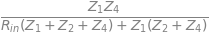

In [50]:
H_facts_z.simplify()

It's not worth my time to analyze Tesla23's answer to determine why there is a difference, especially since the thrust of these notebooks is MNA.

## Summary

- FACTS method looks like it gives an approximate answers to the network unknow voltages and currents. The poles and zeros extracted from branch time constants are approxixmate for complex circuits
- The filter circuit seems too complex to extract poles and zeros from time constants
- The assurtion that brute force is complicated and error prone is not true if computer algebra tools are used